### Machine Learning Assignment 3 : Latent Manifold and Linear Regression


Course code : CMPE-257 <br/>
Group name : Seekers <br/>
        Members :
                   * Anuradha Rajashekar(012409956)
                   * Ashwini Shankar Narayan(012506910)
                   * Nidhi Jamar(010070593)
                   * Sindhu Goudru Shivanandappa Patil(010823683)
                   
#### 1.  Data Story                   
The dataset consists of a list of customers and their statistics related to the credit card transactions over time. The data set contains 18 columns(features) and more than 8k rows(number of samples) of credit card user information. The business objective is to analyse the transactional behaviour of these customers and rank them based on their payment reliability so that the credit card company can target specific promotions to each set of customers.
To acheive this goal, we have followed the below mentioned steps:

1. Data preparation and analysing Payments feature - Sindhu Goudru Shivanandappa Patil
2. Apply Linear Regression and predicting result before data enrichment - Nidhi Jamar
3. Data Enrichment - Anuradha Rajashekar
4. Apply Linear Regression and predicting result post data enrichment - Ashwini Shankar Narayan 
5. Identify Latent Manifold - Entire team
6. Use the manifold to add features to the dataset and run regression based on those new features - Entire team

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#### 2. Dataset Selection 

Dataset Link : https://drive.google.com/open?id=1rSH9G3NfARk76APW1mcFaiHXluCFUPt2

#### 3. Data Preparation

In this step, we read and preprocess the data to identify and remove any invalid values such as NA or ?.
Read and parse the csv file using the pandas Dataframe. Pandas provide a unique advantage over other libraries in preprocessing the data by providing inbuilt APIs for all the math operations on selected row/column or full dataset.
Fill all invalid cells with median value of the column.

In our dataset we do not have any columns with String values, hence there is no need for any transformation of data.
There is no need to randomize the data as there is no pattern in the samples.

In [2]:
# import the data from a file and process the missing fields
data =pd.read_csv("ML_Course_HW_1.csv")
# Check if there are any missing values in the data and fill them with medians of the same column
missing = data.isna().sum()
data = data.fillna( data.median() )

##### Analysing Payments feature

The samples seems to have higher range varying from 0 to 50000 in value for some columns. 
An example can be seen below:

In [3]:
print("BALANCE   : ",data["BALANCE"].min(),data["BALANCE"].max(),data["BALANCE"].median())
print("PURCHASES : ",data["PURCHASES"].min(),data["PURCHASES"].max(),data["PURCHASES"].median())

BALANCE   :  0.0 19043.13856 873.385231
PURCHASES :  0.0 49039.57 361.28


Looking at the two columns listed above, the min and max for purchases has a 49k difference, but the median is 361 which is very small. Hence to scale down the values a log transfomation is applied. 
* We first add a very small offset to the data to avoid undefined values(log(0)=undefined).
* We add the minimum value of the column to shift the values to the positive side of the cartesian system.
* We then take Log-e of each value.
* At the end, we normalise the values to 0-1 range. The resolution of the information is preserved as all the data is stored in 64 bit numpy arrays.

In [4]:
cols = ["BALANCE","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS"]

def normalise(t):
    if(t.min() <=0):
        t=t-t.min()+0.0000000001
    _t = np.log(t)
    _t = (_t-_t.min())
    _t = _t/(_t.max())
    return _t

for i in cols:
    data[i] = normalise(data[i])
  

#### 4. Applying Linear Regression

To perform regression, we need an input and a label. Specifically in our credit card dataset, as we dont have a label, we would try to predict one of our features using Linear regression. For this assignment, we intend to regress on Purchases and Credit Limit features in our dataset.


In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
def regressor(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

    reg = LinearRegression(normalize=True)
    reg.fit(X_train, Y_train)
    Y_pred = reg.predict(X_test)
    mse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
    return mse ,[Y_test, Y_pred]

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


##### 4.1 Linear Regression on Payments Feature

/Users/raunaqmathur/Environments/sjsuml/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


RMSE:  0.14135198659404824


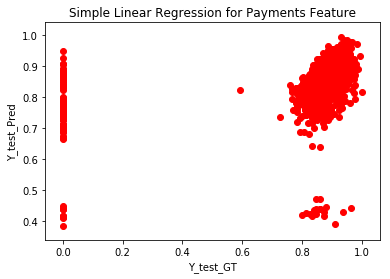

In [6]:
cols = list(data.columns)
cols.remove("CUST_ID")
cols.remove("PAYMENTS")
X = data[cols].iloc[ :, :].values
Y = data["PAYMENTS"]

error, _Y = regressor(X,Y)
print('RMSE: ', error)

 # Plotting data
plt.scatter(_Y[0],_Y[1], color = 'red')
plt.title('Simple Linear Regression for Payments Feature')
plt.xlabel('Y_test_GT')
plt.ylabel('Y_test_Pred')
plt.show()

##### 4.2 Linear Regression on Credit Limit Feature

RMSE:  0.11236743537343023


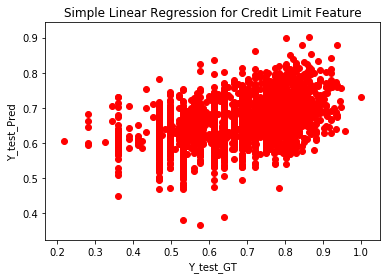

In [7]:
cols = list(data.columns)
cols.remove("CUST_ID")
cols.remove("CREDIT_LIMIT")
X = data[cols].iloc[ :, :].values
Y = data["CREDIT_LIMIT"]

error, _Y = regressor(X,Y)
print('RMSE: ', error)

 # Plotting data
plt.scatter(_Y[0],_Y[1], color = 'red')
plt.title('Simple Linear Regression for Credit Limit Feature')
plt.xlabel('Y_test_GT')
plt.ylabel('Y_test_Pred')
plt.show()

#### 5. Data Enrichment

In our dataset each row is specific to our customer and all the features corresponds to one specific customer. Fetching more information for the same customer from another datasource is highly unlikely. Hence, we intend to enrich more features by adding our intuition about the data set in the form of PCA and clustered information.

As shown above, for Payment Features, the RMSE is 0.14 and for Credit Limit it is 0.11 which is not small for a label dataset that ranges from 0-1. Clearly we are missing some information. Our assumption is that the data posses some math relation with the label and we are trying to predict the relation using linear regression. But in our dataset, payments is an independent feature to all the columns. Hence, we enrich the data with clustering information using GMM and add PCA information.


In [8]:
# Applying GMM
from sklearn.mixture import BayesianGaussianMixture
cols = ["BALANCE","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS"]
vals = data[cols].iloc[ :, 1:].values
gmm = BayesianGaussianMixture(n_components=4, covariance_type='full').fit(vals)
data["cluster"] = gmm.predict( vals )

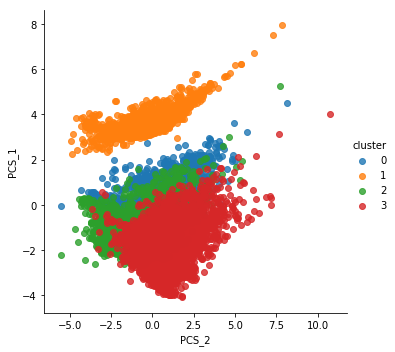

In [9]:
cols = list(data.columns)
cols.remove("CUST_ID")
cols.remove("cluster")
X = data[cols].iloc[ :, 1:].values
Y = data["cluster"]

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# Applying PCA
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

# Plotting graph
data["PCS_1"] = Y_sklearn[:,0]
data["PCS_2"] = Y_sklearn[:,1]
import seaborn as sns
sns.lmplot("PCS_2","PCS_1", data=data, hue='cluster',fit_reg=False)
plt.show()

##### Analysing Payments feature post data enrichment

RMSE:  3.042871969132078e-15


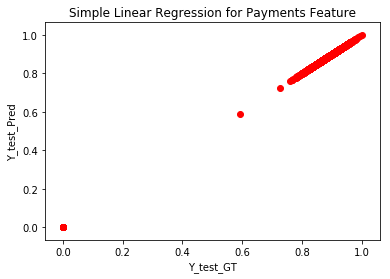

In [10]:
cols = list(data.columns)
cols.remove("CUST_ID")
cols.remove("PAYMENTS")
X = data[cols].iloc[ :, :].values
Y = data["PAYMENTS"]

error, _Y = regressor(X,Y)
print('RMSE: ' , error)

# Plotting graph
plt.scatter(_Y[0],_Y[1], color = 'red')
plt.title('Simple Linear Regression for Payments Feature')
plt.xlabel('Y_test_GT')
plt.ylabel('Y_test_Pred')
plt.show()

##### Analysing Credit Limit feature post data enrichment

RMSE:  9.712330499603943e-16


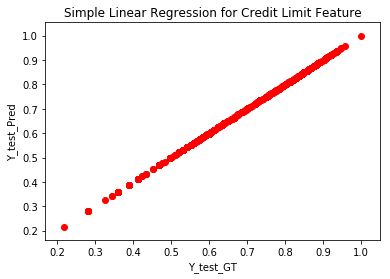

In [11]:
cols = list(data.columns)
cols.remove("CUST_ID")
cols.remove("CREDIT_LIMIT")
X = data[cols].iloc[ :, :].values
Y = data["CREDIT_LIMIT"]

error, _Y = regressor(X,Y)
print('RMSE: ' , error)

# Plotting graph
plt.scatter(_Y[0],_Y[1], color = 'red')
plt.title('Simple Linear Regression for Credit Limit Feature')
plt.xlabel('Y_test_GT')
plt.ylabel('Y_test_Pred')
plt.show()

As a result of the data enrichment, the RMSE for both the Payments and Credit Limit features have decreased significantly.

#### 6. Identify Latent Manifold

In [12]:
# import the data from a file and process the missing fields
_data =pd.read_csv("ML_Course_HW_1.csv")
# Check if there are any missing values in the data and fill them with medians of the same column
missing = _data.isna().sum()
_data = _data.fillna( _data.median() )
#cols = ["BALANCE","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS"]

cols = list(_data.columns)
cols.remove("CUST_ID")

print("Column Name\tMIN\tMAX\tMEDIAN\tInformation Content")

ic = []
for c in cols:
    ic.append(np.var(_data[c])/(np.max(_data[c])-np.min(_data[c])))
ic=ic/np.sum(ic)
i=0
for c in cols:
    print("{}\t{}\t{}\t{}\t{}".format(c,_data[c].min(),_data[c].max(),_data[c].median(),ic[i]))
    i=i+1

Column Name	MIN	MAX	MEDIAN	Information Content
BALANCE	0.0	19043.13856	873.385231	0.18970290011782798
BALANCE_FREQUENCY	0.0	1.0	1.0	4.679410674859762e-05
PURCHASES	0.0	49039.57	361.28	0.07761761588539355
ONEOFF_PURCHASES	0.0	40761.25	38.0	0.056358107083191014
INSTALLMENTS_PURCHASES	0.0	22500.0	89.0	0.030305783555708756
CASH_ADVANCE	0.0	47137.211760000006	0.0	0.07779419864571548
PURCHASES_FREQUENCY	0.0	1.0	0.5	0.00013431910787787657
ONEOFF_PURCHASES_FREQUENCY	0.0	1.0	0.083333	7.42092221216087e-05
PURCHASES_INSTALLMENTS_FREQUENCY	0.0	1.0	0.166667	0.00013170628952932113
CASH_ADVANCE_FREQUENCY	0.0	1.5	0.0	2.226086924712786e-05
CASH_ADVANCE_TRX	0	123	0.0	0.0003157196450070991
PURCHASES_TRX	0	358	7.0	0.001439075051772422
CREDIT_LIMIT	50.0	30000.0	3000.0	0.36857792124853855
PAYMENTS	0.0	50721.483360000006	856.901546	0.13777508360312657
MINIMUM_PAYMENTS	0.019163	76406.20752000001	312.343947	0.05938407334659589
PRC_FULL_PAYMENT	0.0	1.0	0.0	7.133385890016459e-05
TENURE	6	12	12.0	0.00024889836269

Based on the Information Content values as shown above in each column, the three important features are Balance, Purchases and Payments. So, our latent variable (Payment Reliability) is a resultant variable which is derived from some combination of these features.

#### 7. Use the manifold to add features to the dataset and run regression based on those new features.

We are adding a new feature Payment_Reliability to our dataset based on our analysis of the data and calculating it using Balance, Payments and Purchases feature.

RMSE:  2.8685963417885756e-15


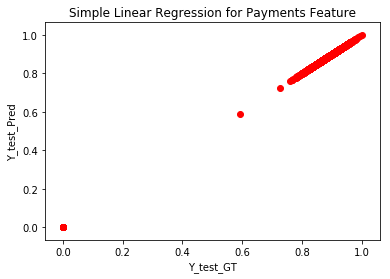

In [13]:
#  Compute payment reliabality

data['PAYMENT_RELIABILITY'] = (1-data['BALANCE'])*(data['PAYMENTS']/(data['PURCHASES']+0.00000001))
cols = list(data.columns)
cols.remove("CUST_ID")
cols.remove("PAYMENTS")
X = data[cols].iloc[ :, :].values
Y = data["PAYMENTS"]

error, _Y = regressor(X,Y)
print('RMSE: ' , error)

# Plotting graph
plt.scatter(_Y[0],_Y[1], color = 'red')
plt.title('Simple Linear Regression for Payments Feature')
plt.xlabel('Y_test_GT')
plt.ylabel('Y_test_Pred')
plt.show()

* How does this improve the interpretability of your model?
    - In our use case, Linear Regression is trying to predict Payments feature against our ground truth Payments feature and clustering this dataset into multiple groups and understanding the differences between the groups will be the inferencing process. In our model due to data enhancement, has reduced error from 0.1413 to 1.21e-15. Hence we dont expect the model to reduce any error, but we expect the inferencing to be much better. 
* How does it add value to your business case?
    - In our usecase, this information will help inferencing differences between clusters and analysing their unique features. This will help us understand the behaviour of customers and to predict their future transactional behaviour as well know how reliable the customer is in terms of payments and purchases.